In [1]:
import pickle
from voc_dataset.voc_segmentation import VocSegmentationUNet
from voc_dataset.voc_index import VocIndex
import cv2
import matplotlib.pyplot as plt

voc_dataset_index_path = "/home/igor/github/my/UNet_segmentator/voc_dataset/voc_segmentation_index.dat"
dataset = VocSegmentationUNet(voc_dataset_index_path, ["person"])

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    return 

In [3]:
example = dataset[21]

print(example.keys())

dict_keys(['input', 'target', 'weight'])


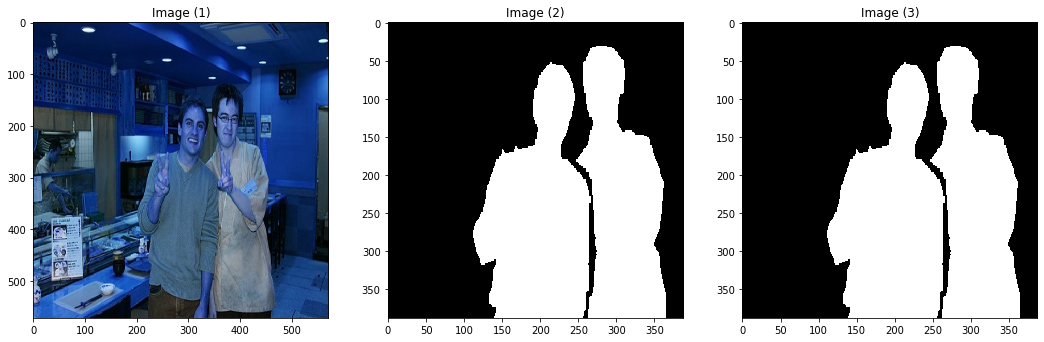

In [7]:
restored_img = dataset.decode_input_image(example["input"])
restored_map = example["target"]
restored_weights = cv2.normalize(example["weight"],None, 0, 255, cv2.NORM_MINMAX)
show_images([restored_img, restored_map, restored_weights])

In [8]:
index.color2label

{(0, 0, 128): 'aeroplane',
 (0, 128, 0): 'bicycle',
 (0, 128, 128): 'bird',
 (128, 0, 0): 'boat',
 (128, 0, 128): 'bottle',
 (128, 128, 0): 'bus',
 (128, 128, 128): 'car',
 (0, 0, 64): 'cat',
 (0, 0, 192): 'chair',
 (0, 128, 64): 'cow',
 (0, 128, 192): 'diningtable',
 (128, 0, 64): 'dog',
 (128, 0, 192): 'horse',
 (128, 128, 64): 'motorbike',
 (128, 128, 192): 'person',
 (0, 64, 0): 'pottedplant',
 (0, 64, 128): 'sheep',
 (0, 192, 0): 'sofa',
 (0, 192, 128): 'train',
 (128, 64, 0): 'tvmonitor'}